# Experimental Classifications

In [1]:
# Imports
import numpy as np
import pandas as pd
import itertools

%matplotlib inline
import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.linear_model import SGDClassifier
from sklearn.neural_network import MLPClassifier

from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
from sklearn.model_selection import train_test_split, GridSearchCV

In [2]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.utils import np_utils
from keras import backend as K
K.set_image_dim_ordering('th')
from keras.models import load_model

/Users/xihua/ENV/lib/python2.7/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


Two useful functions: I wrote one to plot 28x28 pixel images from numpy arrays and will use one to plot the confusion matrix from the [scikit-learn documentation](http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html#sphx-glr-auto-examples-model-selection-plot-confusion-matrix-py).

In [ ]:
def plot_samples(input_array, rows=4, cols=5, title=''):
    '''
    Function to plot 28x28 pixel drawings that are stored in a numpy array.
    Specify how many rows and cols of pictures to display (default 4x5).  
    If the array contains less images than subplots selected, surplus subplots remain empty.
    '''
    
    fig, ax = plt.subplots(figsize=(cols,rows))
    ax.axis('off')
    plt.title(title)

    for i in list(range(0, min(len(input_array),(rows*cols)) )):      
        a = fig.add_subplot(rows,cols,i+1)
        imgplot = plt.imshow(input_array[i,:784].reshape((28,28)), cmap='gray_r', interpolation='nearest')
        plt.xticks([])
        plt.yticks([])

In [ ]:
#ALLOWS YOU TO SEE SAMPLES
plot_samples(ear, title='Sample ear drawings\n')

In [ ]:
# K MEANS

In [ ]:
#DATA PREPROCESSING

# load the data
ear = np.load('datasets/ear.npy')
eye = np.load('datasets/eye.npy')
mouth = np.load('datasets/mouth.npy')
nose = np.load('datasets/nose.npy')

# add a column with labels
ear = np.c_[ear, np.zeros(len(ear))]
eye = np.c_[eye, np.ones(len(eye))]
mouth = np.c_[mouth, 2*np.ones(len(mouth))]
nose = np.c_[nose, 3*np.ones(len(nose))]

# store the label codes in a dictionary
label_dict = {0:'ear', 1:'eye', 2:'mouth', 3:'nose'}

#PREPARE DATA FOR SCIKIT-LEARN

X = np.concatenate((ear[:72500,:-1], eye[:72500,:-1], mouth[:72500,:-1], nose[:72500,:-1]), axis=0).astype('float32') # all columns but the last
y = np.concatenate((ear[:72500,-1], eye[:72500,-1], mouth[:72500,-1], nose[:72500,-1]), axis=0).astype('float32') # the last column

# train/test split (divide by 255 to obtain normalized values between 0 and 1)
# I will use a 50:50 split, since I want to start by training the models on 5'000 samples and thus have plenty of samples to spare for testing.
X_train, X_test, y_train, y_test = train_test_split(X/255.,y,test_size=0.2,random_state=0)

In [ ]:
ear0=ear[0:1,:-1]/255.
eye0=eye[0:1,:-1]/255.
mouth0=mouth[0:1,:-1]/255.
nose0=nose[0:1,:-1]/255.
print np.shape(X_train[0])
print np.shape(ear0)
init_c = np.vstack((ear0,eye0,mouth0,nose0))
print np.shape(init_c)

In [ ]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4, init = init_c, random_state=0).fit(X_train)

In [ ]:
l = kmeans.labels_
c = kmeans.cluster_centers_
print np.shape(l)
print np.shape(c)

In [ ]:
sample = mouth[7:8,:-1]/255
kmeans.predict(sample)[0]

In [ ]:
preds = [0,0,0,0]
for i in range(20000,20625):
    j = i + 1
    #to read in a sample, divide by 255
    sample = mouth[i:j,:-1]/255
    #print np.shape(sample)
    sample_pred = int(kmeans.predict(sample)[0])
    count = preds[sample_pred]
    preds[sample_pred] += 1
    if count < 3:
        outfile = "kmeans/mouth_" + str(i) + "_" + str(int(sample_pred)) + ".png"
        imgplot = plt.imshow(sample.reshape((28,28)), cmap='gray_r', interpolation='nearest')
        plt.savefig(outfile)
print preds

## K Nearest Neighbors

In [ ]:
#DATA PREPROCESSING

# load the data
ear = np.load('datasets/ear.npy')
eye = np.load('datasets/eye.npy')
mouth = np.load('datasets/mouth.npy')
nose = np.load('datasets/nose.npy')

# add a column with labels
ear = np.c_[ear, np.zeros(len(ear))]
eye = np.c_[eye, np.ones(len(eye))]
mouth = np.c_[mouth, 2*np.ones(len(mouth))]
nose = np.c_[nose, 3*np.ones(len(nose))]

# store the label codes in a dictionary
label_dict = {0:'ear', 1:'eye', 2:'mouth', 3:'nose'}

In [ ]:
#PREPARE DATA FOR SCIKIT-LEARN

X = np.concatenate((ear[:72500,:-1], eye[:72500,:-1], mouth[:72500,:-1], nose[:72500,:-1]), axis=0).astype('float32') # all columns but the last
y = np.concatenate((ear[:72500,-1], eye[:72500,-1], mouth[:72500,-1], nose[:72500,-1]), axis=0).astype('float32') # the last column

# train/test split (divide by 255 to obtain normalized values between 0 and 1)
# I will use a 50:50 split, since I want to start by training the models on 5'000 samples and thus have plenty of samples to spare for testing.
X_train, X_test, y_train, y_test = train_test_split(X/255.,y,test_size=0.2,random_state=0)

In [ ]:
%%time 

#RUN KNN ALGORITHM
clf_knn = KNeighborsClassifier(n_neighbors = 4,n_jobs=-1)
clf_knn.fit(X_train, y_train)
y_pred_knn = clf_knn.predict(X_test)
acc_knn = accuracy_score(y_test, y_pred_knn)
print ('KNN accuracy: ',acc_knn)

In [ ]:
#GET INDIVIDUAL PREDICTIVE SCORE
#read in data file or choose one:
print np.shape(X_test)
print np.shape(y_pred_knn)
test_sample = X_test[0:1]
print np.shape(test_sample)
test_pred = clf_knn.predict(test_sample)
print test_pred
imgplot = plt.imshow(test_sample.reshape((28,28)), cmap='gray_r', interpolation='nearest')
plt.savefig("test.png")
print np.shape(ear[:12500,:-1])

In [ ]:
errors = 0
for i in range(20000,20625):
    j = i + 1
    #to read in a sample, divide by 255
    sample = mouth[i:j,:-1]/255
    #print np.shape(sample)
    sample_pred = clf_knn.predict(sample)
    if not(sample_pred == 2):
        errors += 1
        #print i, sample_pred
        #if errors <= 25:
            #outfile = "knnerrors/nose_" + str(i) + "_" + str(int(sample_pred[0])) + ".png"
            #imgplot = plt.imshow(sample.reshape((28,28)), cmap='gray_r', interpolation='nearest')
            #plt.savefig(outfile)
print errors

## Convolutional Neural Network (CNN)

Let's try out a Convolutional Neural Network (CNN) with Keras. I will use a model from this [tutorial](http://machinelearningmastery.com/handwritten-digit-recognition-using-convolutional-neural-networks-python-keras/) by Jason Brownlee. It has the following 9 layers:

1. Convolutional layer with 30 feature maps of size 5×5. 
2. Pooling layer taking the max over 2*2 patches. 
3. Convolutional layer with 15 feature maps of size 3×3.
4. Pooling layer taking the max over 2*2 patches.
5. Dropout layer with a probability of 20%. 
6. Flatten layer. 
7. Fully connected layer with 128 neurons and rectifier activation. 
8. Fully connected layer with 50 neurons and rectifier activation. 
9. Output layer.

Keras requires one hot encoding of the y labels:

In [15]:
# define the CNN model
def cnn_model():
    # create model
    model = Sequential()
    model.add(Conv2D(30, (5, 5), input_shape=(1, 28, 28), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.2))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))
    # Compile model
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [16]:
print np.shape(X_test_cnn)
print np.shape(y_pred_cnn)
test_sample = X_test_cnn[0:1]
print np.shape(test_sample)
test_pred = model.predict_classes(test_sample, verbose=0)
print test_pred

(58000, 1, 28, 28)


NameError: name 'y_pred_cnn' is not defined

CNN CODE : Preprocessing for Keras:

In [5]:
#DATA PREPROCESSING

# load the data
ear = np.load('datasets/ear.npy')
eye = np.load('datasets/eye.npy')
mouth = np.load('datasets/mouth.npy')
nose = np.load('datasets/nose.npy')

# add a column with labels
ear = np.c_[ear, np.zeros(len(ear))]
eye = np.c_[eye, np.ones(len(eye))]
mouth = np.c_[mouth, 2*np.ones(len(mouth))]
nose = np.c_[nose, 3*np.ones(len(nose))]

# store the label codes in a dictionary
label_dict = {0:'ear', 1:'eye', 2:'mouth', 3:'nose'}

#PREPARE DATA FOR SCIKIT-LEARN

X = np.concatenate((ear[:72500,:-1], eye[:72500,:-1], mouth[:72500,:-1], nose[:72500,:-1]), axis=0).astype('float32') # all columns but the last
y = np.concatenate((ear[:72500,-1], eye[:72500,-1], mouth[:72500,-1], nose[:72500,-1]), axis=0).astype('float32') # the last column

# train/test split (divide by 255 to obtain normalized values between 0 and 1)
# I will use a 50:50 split, since I want to start by training the models on 5'000 samples and thus have plenty of samples to spare for testing.
X_train, X_test, y_train, y_test = train_test_split(X/255.,y,test_size=0.2,random_state=0)

In [6]:
# one hot encode outputs
y_train_cnn = np_utils.to_categorical(y_train)
y_test_cnn = np_utils.to_categorical(y_test)
num_classes = y_test_cnn.shape[1]

In [7]:
# reshape to be [samples][pixels][width][height]
X_train_cnn = X_train.reshape(X_train.shape[0], 1, 28, 28).astype('float32')
X_test_cnn = X_test.reshape(X_test.shape[0], 1, 28, 28).astype('float32')

In [ ]:
%%time

# build the model
model = cnn_model()
# Fit the model
model.fit(X_train_cnn, y_train_cnn, validation_data=(X_test_cnn, y_test_cnn), epochs=30, batch_size=100)
#save the model
model.save("checkpoint/checkpoint_300K.h5")
#model = load_model('my_model.h5')

In [8]:
model = cnn_model()
model = load_model("checkpoint/checkpoint_300K.h5")

Again, the CNN with Keras performed best.

Let's take a look at the predictions of the CNN:

In [ ]:
# Final evaluation of the model
scores = model.evaluate(X_test_cnn, y_test_cnn, verbose=0)
print('Final CNN accuracy: ', scores[1])

In [ ]:
print np.shape(X_test_cnn)
test_sample = X_test_cnn[0:1]
print np.shape(test_sample)
test_pred = model.predict_classes(test_sample)
test_pred = model.predict(test_sample)
conf = max(test_pred[0])
print test_pred
print conf

[1, 7, 0, 2]


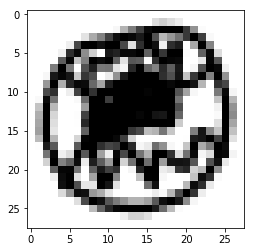

In [14]:
errors = [0,0,0,0]
for i in range(20000,20625):
    j = i + 1
    #to read in a sample, divide by 255
    sample = mouth[i:j,:-1]/255
    sample = np.reshape(sample,(1,1,28,28))
    #print np.shape(sample)
    sample_pred = model.predict_classes(sample,verbose=0)
    if not(sample_pred == 2):
        errors[int(sample_pred)] = errors[int(sample_pred)] + 1
        #print i, sample_pred
        if sum(errors) <= 5:
            outfile = "cnnerrors/mouth_" + str(i) + "_" + str(int(sample_pred[0])) + ".png"
            imgplot = plt.imshow(sample.reshape((28,28)), cmap='gray_r', interpolation='nearest')
            plt.savefig(outfile)
print errors

In [ ]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred_cnn)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['dog','octopus','bee','hedgehog','giraffe'],
                      title='Confusion matrix, without normalization')

plt.show()

Let's see what probabilities were predicted by the model:

In [ ]:
cnn_probab = model.predict(X_test_cnn, batch_size=32, verbose=0)

# extract the probability for the label that was predicted:
p_max = np.amax(cnn_probab, axis=1)

plt.hist(p_max, normed=True, bins=list(np.linspace(0,1,11)));
plt.xlabel('p of predicted class');

For about 70% of the pictures, the CNN predicted the label with > 90% certainty.

If the predictions of the CNN are well calibrated, the average prediction certainty should be equal to the accuracy (90%), which is indeed the case:

In [ ]:
np.mean(p_max)

The lowest certainty of a prediction is about 25%:

In [ ]:
np.amin(p_max)

Let's take a look at some predictions in detail:

In [ ]:
fig, ax = plt.subplots(figsize=(6,15))

for i in list(range(10)):

    # plot probabilities:
    ax = plt.subplot2grid((10, 5), (i, 0), colspan=4);
    plt.bar(np.arange(5), cnn_probab[i], 0.35, align='center');
    plt.xticks(np.arange(5), ['dog','octopus','bee','hedgehog','giraffe'])
    plt.tick_params(axis='x', bottom='off', top='off')
    plt.ylabel('Probability')
    plt.ylim(0,1)
    plt.subplots_adjust(hspace = 0.5)

    # plot picture:
    ax = plt.subplot2grid((10, 5), (i, 4));
    plt.imshow(X_test[i].reshape((28,28)),cmap='gray_r', interpolation='nearest');
    plt.xlabel(label_dict[y_test[i]]); # get the label from the dict
    plt.xticks([])
    plt.yticks([])

Let's take a look at some pictures where the CNN was very unsure about the label by filtering with [p_max<0.4]:

In [ ]:
fig, ax = plt.subplots(figsize=(6,15))

for i in list(range(10)):
    
    # plot probabilities:
    ax = plt.subplot2grid((10, 5), (i, 0), colspan=4);
    plt.bar(np.arange(5), cnn_probab[p_max<0.4][i], 0.35, align='center');
    plt.xticks(np.arange(5), ['dog','octopus','bee','hedgehog','giraffe'])
    plt.tick_params(axis='x', bottom='off', top='off')
    plt.ylabel('Probability')
    plt.ylim(0,1)
    plt.subplots_adjust(hspace = 0.5)

    # plot picture:
    ax = plt.subplot2grid((10, 5), (i, 4));
    plt.imshow(X_test[p_max<0.4][i].reshape((28,28)),cmap='gray_r', interpolation='nearest');
    plt.xlabel(label_dict[y_test[p_max<0.4][i]]); # get the label from the dict
    plt.xticks([])
    plt.yticks([])

It seems that there is still some room for improvement. Notably, I have used just about 2% of the pictures for training. By increasing that number, big increases in accuracy would certainly be possible.